# Bramki wielokubitowe

In [1]:
from qiskit import (QuantumCircuit, QuantumRegister, ClassicalRegister, 
                    execute, Aer, __qiskit_version__)
from qiskit.visualization import plot_bloch_multivector
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def obwod(strategia):
    qc = QuantumCircuit(QuantumRegister(1, name='qGra'))
    for bramka in strategia:
        if bramka == 'I':
            qc.id(0)
        elif bramka == 'H':
            qc.h(0)
        elif bramka == 'X':
            qc.x(0)
    return qc

%matplotlib inline
def animacja(strategia):
    qc = QuantumCircuit(QuantumRegister(1, name="q0"))
    symulator = Aer.get_backend('statevector_simulator')
    wynik = execute(qc, backend=symulator).result()
    stan = wynik.get_statevector()
    display(stan)
    print("stan poczatkowy:")
    display(plot_bloch_multivector(stan))
    plt.show()
    for it, bramka in enumerate(strategia):
        if bramka == 'I':
            qc.id(0)
        elif bramka == 'H':
            qc.h(0)
        elif bramka == 'X':
            qc.x(0)
        wynik = execute(qc, backend=symulator).result()
        stan = wynik.get_statevector()
        print("stan po bramce", bramka)
        display(plot_bloch_multivector(stan))
        plt.show()

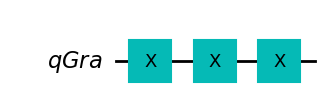

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
stan poczatkowy:


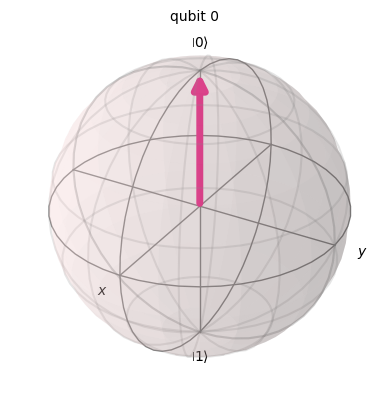

stan po bramce X


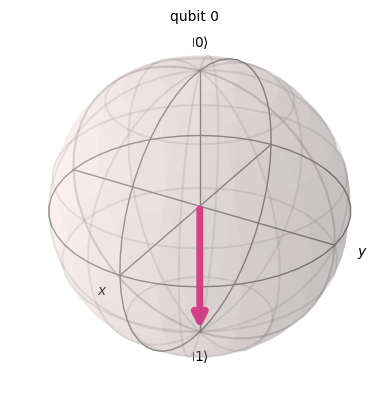

stan po bramce X


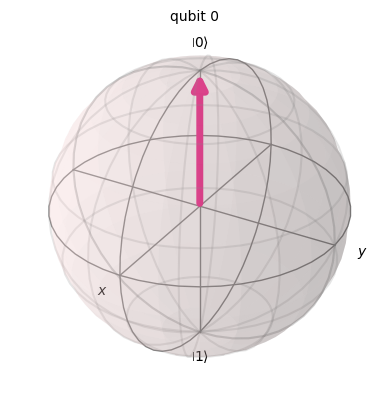

stan po bramce X


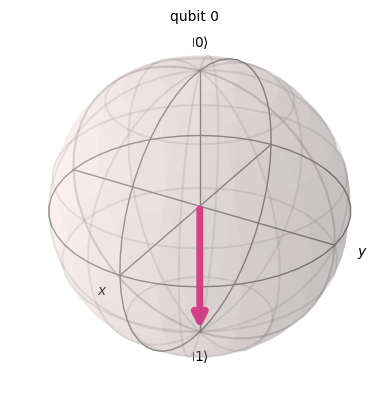

In [3]:
strategia = 'XXX'
display(obwod(strategia).draw('mpl'))
animacja(strategia)

In [4]:
def sedzia(obwod):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    ob = QuantumCircuit(qr, cr)
    ob.append(obwod, qr)
    ob.measure(0, 0)
    return  execute(ob, backend=Aer.get_backend('qasm_simulator'), shots=1000).result()


In [5]:
strategia = 'XXX'
stats = sedzia(obwod(strategia)).get_counts()
print(stats)

{'1': 1000}


In [6]:
strategia = 'HXH'
stats = sedzia(obwod(strategia)).get_counts()
print(stats)

{'0': 1000}


In [7]:
def klasycze_strategie():
    wyniki = []
    for ruch_1 in ['I','X']:
        for ruch_2 in ['I','X']:
            for ruch_3 in ['I','X']:
                strategia = ruch_1 + ruch_2 + ruch_3
                print("strategia",strategia)
                ob = obwod(strategia)
                display(ob.draw('mpl'))
                plt.show()
                stats = sedzia(ob).get_counts()
                print("statystyka", stats)
                wyniki.append((strategia, stats))

strategia III


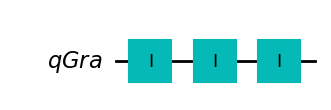

statystyka {'0': 1000}
strategia IIX


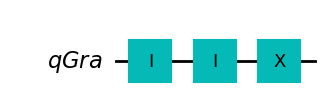

statystyka {'1': 1000}
strategia IXI


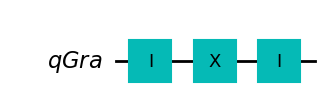

statystyka {'1': 1000}
strategia IXX


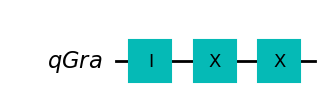

statystyka {'0': 1000}
strategia XII


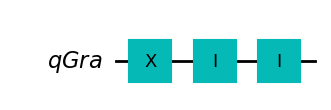

statystyka {'1': 1000}
strategia XIX


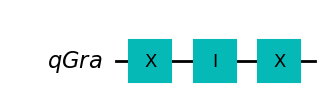

statystyka {'0': 1000}
strategia XXI


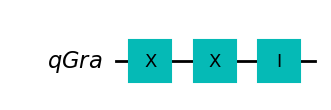

statystyka {'0': 1000}
strategia XXX


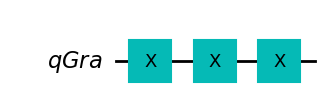

statystyka {'1': 1000}


In [8]:
klasycze_strategie()

In [9]:
def kwantowe_strategie():
    wyniki = []
    for ruch_1 in ['H']:
        for ruch_2 in ['I','X']:
            for ruch_3 in ['H']:
                strategia = ruch_1 + ruch_2 + ruch_3
                print("strategia",strategia)
                ob = obwod(strategia)
                display(ob.draw('mpl'))
                plt.show()
                stats = sedzia(ob).get_counts()
                print("statystyka", stats)
                wyniki.append((strategia, stats))

strategia HIH


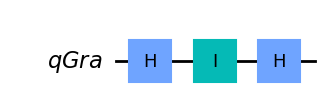

statystyka {'0': 1000}
strategia HXH


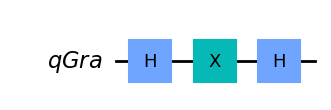

statystyka {'0': 1000}


In [10]:
kwantowe_strategie()

# Proste obwody kwantowe

`Barriers` - służą do oddzielenia logicznych części obwodu. Nie mają wpływu na działanie obwodu, ale mogą pomóc w jego czytelności.

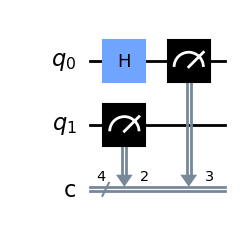

In [11]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,4)
qc.h(0)
qc.measure([1,0],[2,3])
qc.draw('mpl')

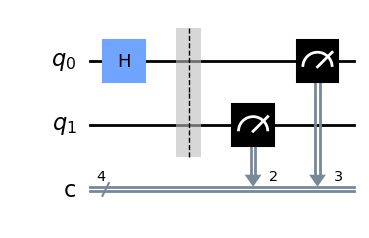

In [12]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,4)
qc.h(0)
qc.barrier()
qc.measure([1,0],[2,3])
qc.draw('mpl')

## Losowy bajt

In [14]:
# generator liczb losowych
from random import randrange
''.join([str(randrange(2)) for i in range(8)])

'00011001'

In [15]:
# mozna takze zrealizowac jako rzut monetą 

import random
for n in range(5):
    if random.random()<0.5:       #if the random number is less than 0.5 print heads
        print('HEADS')
    else:
        print('TAILS')

HEADS
TAILS
TAILS
HEADS
TAILS


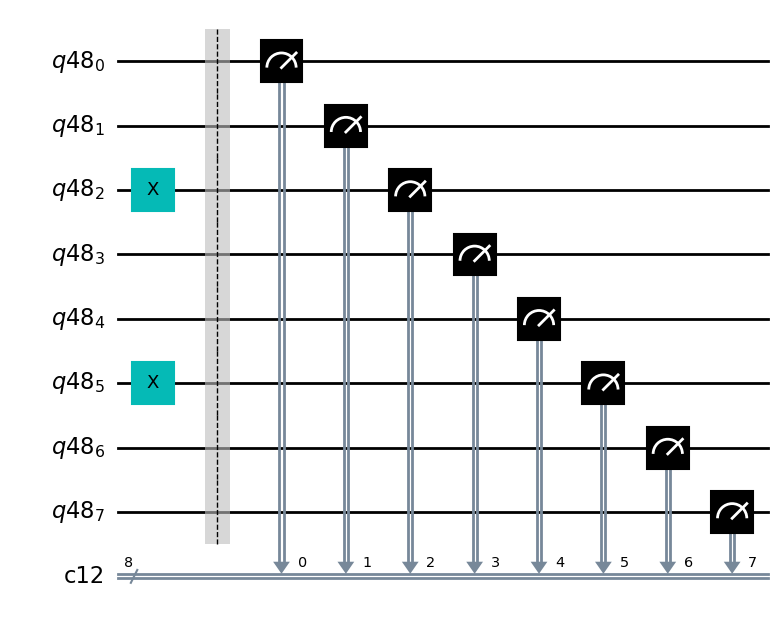

In [16]:
# LOSOWY BAJT 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
q = QuantumRegister(8)
c = ClassicalRegister(8)

qc = QuantumCircuit(q,c)
# tutaj kod losowania 
for i in range(8):
    if randrange(2) == 0:
        qc.x(q[i])
        
qc.barrier()
qc.measure(q,c)
qc.draw('mpl')

In [17]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=10)
counts = job.result().get_counts()

In [18]:
counts

{'00100100': 10}

In [19]:
print(list(counts)[0], "wynosi: ", int(list(counts)[0],2))

00100100 wynosi:  36


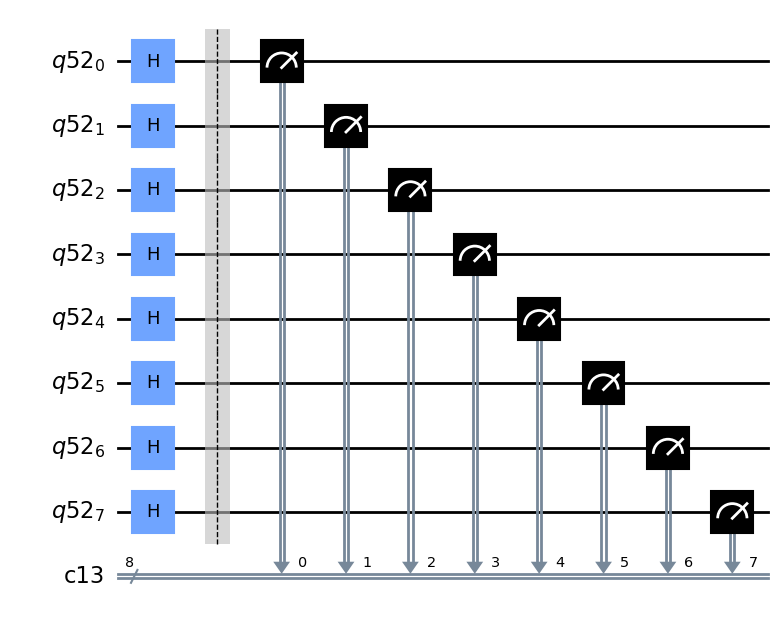

{'01000110': 1,
 '00001001': 1,
 '00100100': 1,
 '11000000': 1,
 '01000011': 1,
 '11010001': 1,
 '11100110': 1,
 '11100100': 1,
 '10101011': 1,
 '11001100': 1}

In [20]:
# losowy kwantowo bajt 
# LOSOWY BAJT 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
q = QuantumRegister(8)
c = ClassicalRegister(8)

qc = QuantumCircuit(q,c)
# tutaj kod losowania 
qc.h(q)        
qc.barrier()
qc.measure(q,c)
display(qc.draw('mpl'))
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=10)
counts = job.result().get_counts()
counts

In [21]:
for el in counts:
    print(int(el,2))

70
9
36
192
67
209
230
228
171
204


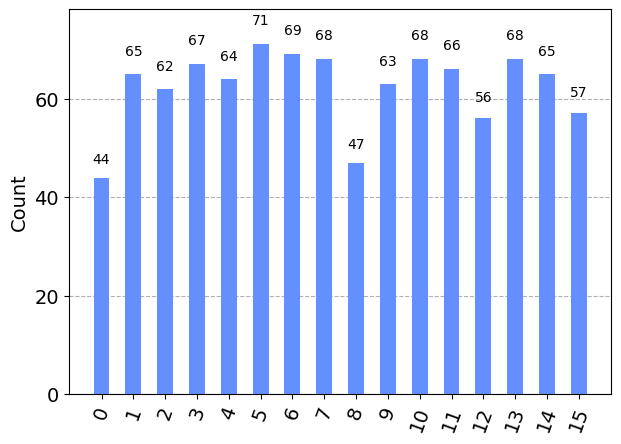

In [22]:
# losowanie z zakresu liczb 0-15 
n = 4
q = QuantumRegister(n)
c = ClassicalRegister(n)
circuit = QuantumCircuit(q, c)

for j in range(n):
    circuit.h(q[j])
    
circuit.measure(q,c)

job = execute(circuit,  Aer.get_backend('qasm_simulator'), shots=1000)

# get the histogram of bit string results, convert it to one of integers and plot it
bit_counts = job.result().get_counts()
int_counts = {}
for bitstring in bit_counts:
    int_counts[ int(bitstring,2) ] = bit_counts[bitstring]

from qiskit.tools.visualization import plot_histogram    
plot_histogram(int_counts)

## SWAP GATE

$$
\text{SWAP}\ket{01} = \ket{10}
$$

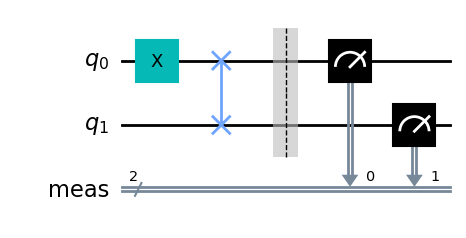

In [23]:
qc = QuantumCircuit(2)
qc.x(0)
qc.swap(0,1)
qc.measure_all()
qc.draw('mpl')

In [ ]:
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1).result()
counts.get_counts()

## Stany splątane

In [24]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(0,1)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()

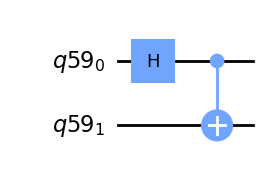

<IPython.core.display.Latex object>

In [25]:
display(qc.draw('mpl'))
state.draw('latex')

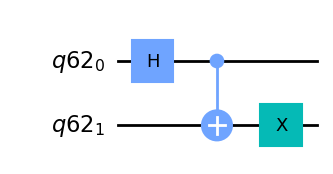

<IPython.core.display.Latex object>

In [26]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(0,1)
qc.x(1)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
display(qc.draw('mpl'))
state.draw('latex')

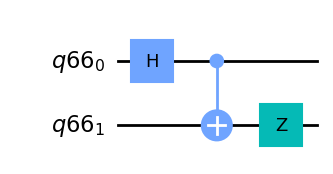

<IPython.core.display.Latex object>

In [27]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(0,1)
qc.z(1)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
display(qc.draw('mpl'))
state.draw('latex')

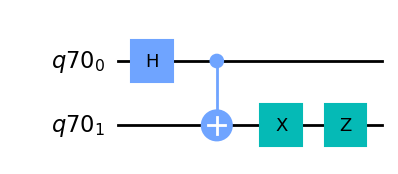

<IPython.core.display.Latex object>

In [28]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(0,1)
qc.x(1)
qc.z(1)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
display(qc.draw('mpl'))
state.draw('latex')

## Half adder cirquit
### Napisz operator 1+1 na układzie 4 kubitów 

$$
0+0 = 00
$$
$$
0+1 = 01
$$
$$
1+0 = 01
$$
$$
1+1 = 10
$$

zauwaz, ze mamy dwa typy rozwiązań: 

- dwa bity wejsciowe są takie same  (00, 11) i dają na prawym bicie odpowiedzi 0. 
- dwa bity wejsciowe są rózne (10,01) i dają na prawym bicie odpowiedzi 1. 


Aby napisać prawidłowe rozwiązanie musimy stworzyć bramki, które będą rozpoznawać czy dwa kubity są takie same czy tez rózne. Dla przypomnienia - klasycznie rolę taką pełni bramka `XOR`.

| Input 1   | Input 2 | XOR |
| -------- | ------- |--------|
| 0  | 0    |  0|
| 0 | 1    | 1  |
| 1   | 1    | 1 |
| 1   |  0 | 0 |

Podobnie działa bramka CNOT 

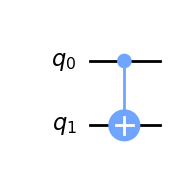

In [29]:
qc  = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')

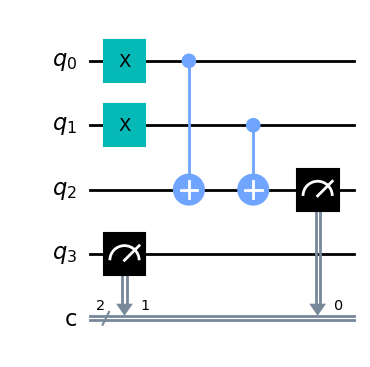

In [30]:
qc = QuantumCircuit(4,2)
# zakodowanie danych wejściowych do kubitu 1 i 2 
qc.x(0) 
qc.x(1) # bo chcemy policzyc 1+1 
# uzyjemy CNOT - bramka XOR dla porownania kubitow 1 i 2
qc.cx(0,2)
qc.cx(1,2)
qc.measure(2,0) # wydobycie wyniku XOR
qc.measure(3,1) # wydobycie wyniku AND
qc.draw(output='mpl')

Zastosowanie dwóch CNOT do inputów rozwiązuje nam problem prawego bitu odpowiedzi. 

Co z pierszym bitem odpowiedzi otrzymywanym po pomiarzze `q3` ? 

- jego wartość dla pierwszych trzech równań zawsze wynosi 0. 

Jednak dla równania 1+1 powinniśmy otrzymać 1. 

Do rozwiązania tego problemu mozna wykorzystać bramkę operującą na 3 kubitach. 
Bramka ta to bramka `Toffoli`. 

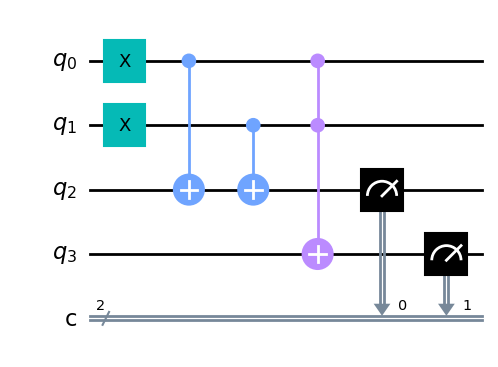

In [31]:
qc = QuantumCircuit(4,2)
# zakodowanie danych wejściowych do kubitu 1 i 2 
qc.x(0) 
qc.x(1) # bo chcemy policzyc 1+1 
# uzyjemy CNOT
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3) # AND
qc.measure(2,0) # wydobycie wyniku XOR
qc.measure(3,1) # wydobycie wyniku AND
qc.draw(output='mpl')

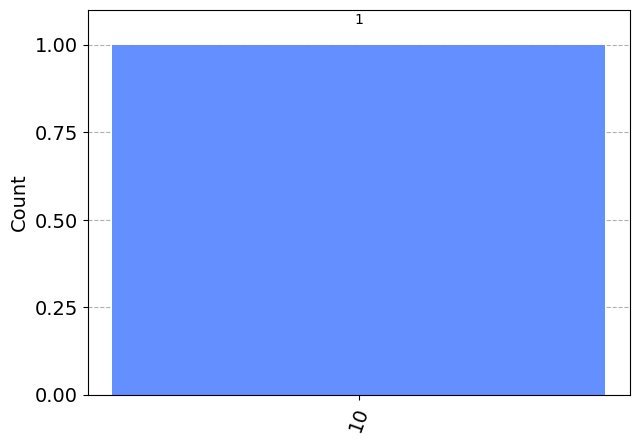

In [32]:
from qiskit.visualization import plot_histogram
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=1).result().get_counts()
plot_histogram(counts)

Dla przypomnienia: 


In [33]:
print("wynik 1+1 =",int('10',2))

wynik 1+1 = 2


sprawdźmy wszystkie mozliwe wyniki

In [34]:
for input in ['00','01','10','11']:
    
    mycircuit1 = QuantumCircuit(4,2)
    
    #Initialization - Note qiskit order
    if input[0] == '1':
        mycircuit1.x(1)
    if input[1] == '1':
        mycircuit1.x(0)

    mycircuit1.cx(0,2)
    mycircuit1.cx(1,2)
    mycircuit1.ccx(0,1,3)

    mycircuit1.measure(2,0)
    mycircuit1.measure(3,1)

    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(mycircuit1)
    print("Input:", input, "Output:", counts)

Input: 00 Output: {'00': 1}
Input: 01 Output: {'01': 1}
Input: 10 Output: {'01': 1}
Input: 11 Output: {'10': 1}


> Zadanie - czy potrafisz utworzyć 3 kubitową wersję bramki `OR`